# Chem 277B - Fall 2024 - Homework 2 
## Logistic Regression
*Submit this notebook to bCourses to receive a credit for this assignment.*
<br>
due: **Sept 30 2024** 
<br>
**Please upload both, the .ipynb file and the corresponding .pdf**<br>
<br>
## Problem (25 P)

Write a Python script **AnalyzeMoleculesLogReg** using *def*, that performs the following analysis:<br>
<br>
1) Loading the **categorical** molecule data set *"molecular_test_gbc_cat.csv"* and *"molecular_train_gbc_cat.csv"*<br>
2) Performing a **logistic regression** using the Python libarary *statsmodels*. The syntax is<br>

In [1]:
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#import
Test = pd.read_csv("data_277b_HW/molecular_test_gbc.csv")
Train = pd.read_csv("data_277b_HW/molecular_train_gbc.csv")

test_features = Test.drop(columns = "label")
train_features = Train.drop(columns = "label")

#combine and scale
combined_ds = pd.concat([test_features, train_features], axis = 0)

(rows, _) = Train.shape

scaler = MinMaxScaler(feature_range = (0,1))
combined_ds_scaled = scaler.fit_transform(combined_ds)

Train_scaled = pd.DataFrame(combined_ds_scaled[:rows,:], columns = train_features.columns)
Test_scaled = pd.DataFrame(combined_ds_scaled[rows:,:], columns = test_features.columns)

TrainX_scaled = Train_scaled


X = sm.add_constant(TrainX_scaled)# adding intercept
Y = pd.get_dummies(Train['label'], drop_first = True)# label into dummies

#perform logistic regression 
my_model = sm.GLM(Y, X, family = sm.families.Binomial()).fit()
#return summary of logistic regression model
my_model.summary()

#evaluate model by returning the accuracy

y_pred_probabilities = my_model.predict(X)

y_pred = (y_pred_probabilities >= 0.5).astype(int)
accuracy = accuracy_score(Y, y_pred)

print(accuracy)


0.51


Don't forget proper scaling of the data (see also the lecture slides)!

3) Evaluating the model by returning the accuracy.<br>
4) Evaluating the model by creating a **confusion matrix**. The **confusion matrix** can be generated with sns.heatmap or by using the corresponding library<br>

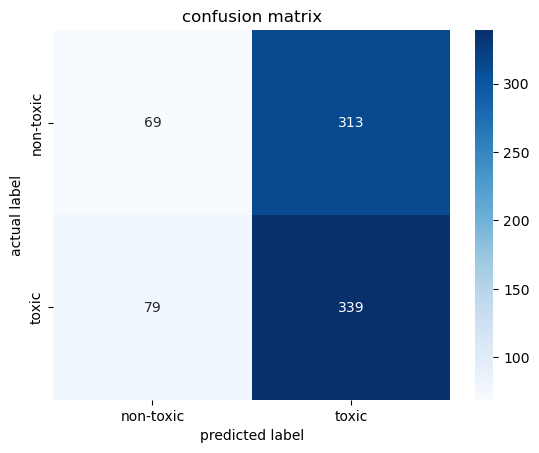

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#confusion_matrix(actual, predicted)
cm = confusion_matrix(Y, y_pred)

sns.heatmap(cm,
            annot = True,
            fmt = 'd',
            cmap = "Blues",
            xticklabels = ["non-toxic", "toxic"],
            yticklabels = ["non-toxic","toxic"])

plt.title('confusion matrix')
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

The result should look similar to the following plot:<br>
<br>
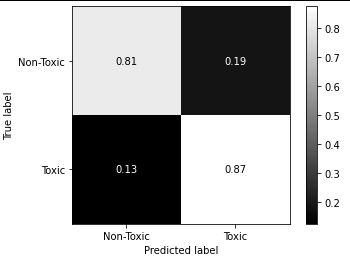

5) Evaluating the model by plotting a histogram that shows how certain the model was in terms of assigned probabilities to the predicted classes. The result should look similar to the following plot:<br>
<br>

In [5]:
display(Y)

,Toxic
0,True
1,True
2,False
3,False
4,False
...,...
795,True
796,False
797,False
798,True


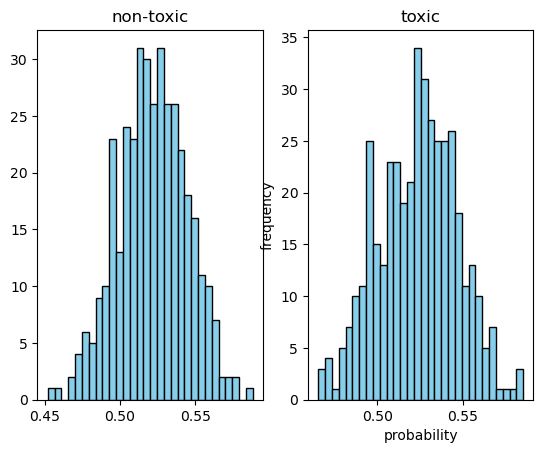

In [6]:
import matplotlib.pyplot as plt

non_toxic = y_pred_probabilities[Y['Toxic'] == False]
toxic = y_pred_probabilities[Y['Toxic'] == True]

plt.subplot(1,2,1)
plt.hist(non_toxic, bins = 30, color = 'skyblue', edgecolor = 'black')
plt.title('non-toxic')

plt.subplot(1,2,2)
plt.hist(toxic, bins = 30, color = 'skyblue', edgecolor = 'black')
plt.title('toxic')

plt.xlabel('probability')
plt.ylabel('frequency')


plt.show()


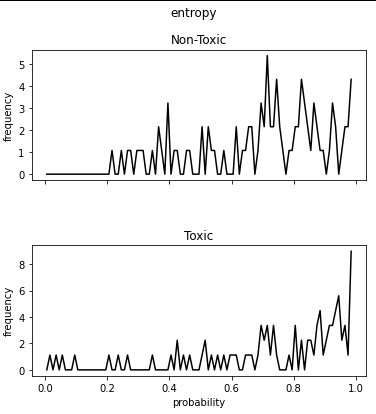